In [1]:
# Step 1: Import necessary libraries
import pandas as pd # type: ignore
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn.linear_model import LogisticRegression # type: ignore
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # type: ignore


In [2]:
# Step 2: Load the dataset
file_path = r"C:\Users\debku\OneDrive\Desktop\heart_disease_prediction\heart_disease_prediction_model\data\cleaned_heart_disease_data.csv"
df = pd.read_csv(file_path)

In [3]:
# Step 3: Display basic information about the dataset
print("Dataset Info:\n", df.info())
print("\nFirst 5 Rows:\n", df.head())
print("\nLast 5 Rows:\n" ,df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    int64  
 3   dataset   920 non-null    object 
 4   cp        920 non-null    int64  
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       0 non-null      float64
 8   restecg   739 non-null    float64
 9   thalch    865 non-null    float64
 10  exang     0 non-null      float64
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    float64
 13  ca        309 non-null    float64
 14  thal      434 non-null    float64
 15  num       920 non-null    int64  
 16  target    920 non-null    int64  
dtypes: float64(10), int64(6), object(1)
memory usage: 122.3+ KB
Dataset Info:
 None

First 5 Rows:
    id  age  sex    dataset  cp  trestbps   chol  fbs 

In [4]:

# Step 4: Data Cleaning
# Checking for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs         920
restecg     181
thalch       55
exang       920
oldpeak      62
slope       309
ca          611
thal        486
num           0
target        0
dtype: int64


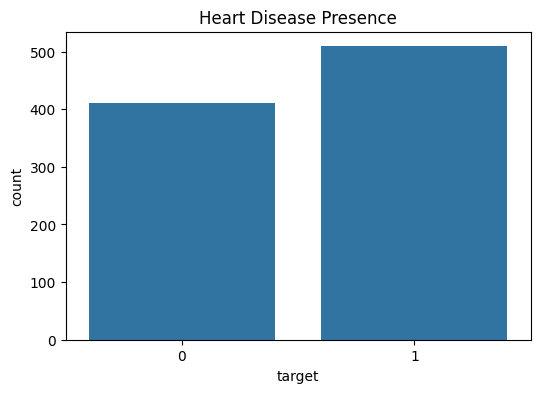

In [5]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Heart Disease Presence')
plt.show()

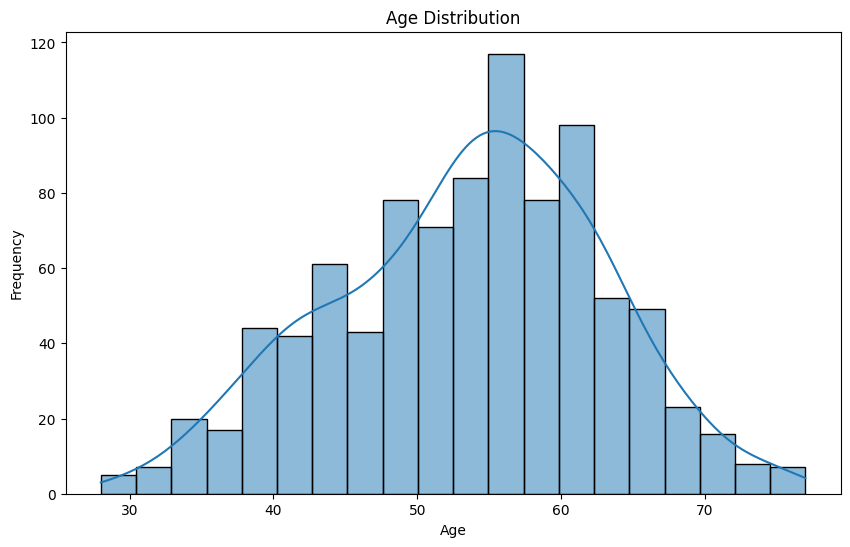

In [6]:
# Visualizing age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\debku\AppData\Local\Temp\ipykernel_15244\4171484383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=df, palette='coolwarm')


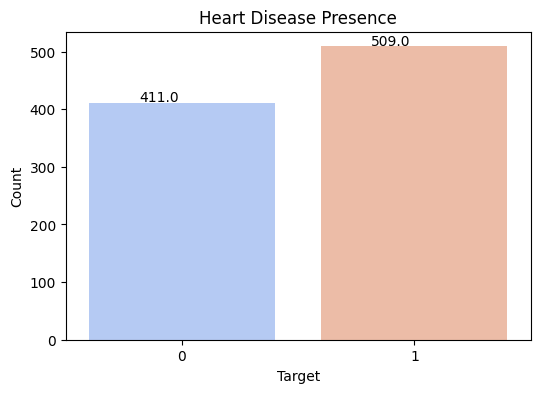

In [7]:
# Distribution of the target variable with count plot and annotations
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='target', data=df, palette='coolwarm')
plt.title('Heart Disease Presence')
plt.xlabel('Target')
plt.ylabel('Count')
# Adding annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + 0.3, p.get_height() + 2), ha='center')

plt.show()

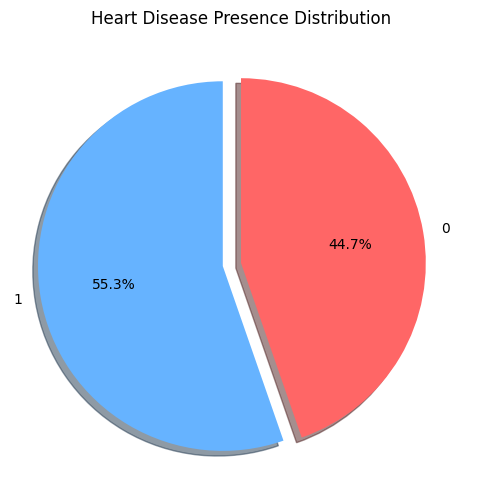

In [8]:
# Pie chart for target distribution
plt.figure(figsize=(6, 6))
df['target'].value_counts().plot.pie(
    autopct='%1.1f%%', 
    colors=['#66b3ff', '#ff6666'], 
    startangle=90, 
    explode=[0.1, 0], 
    shadow=True
)
plt.title('Heart Disease Presence Distribution')
plt.ylabel('')
plt.show()

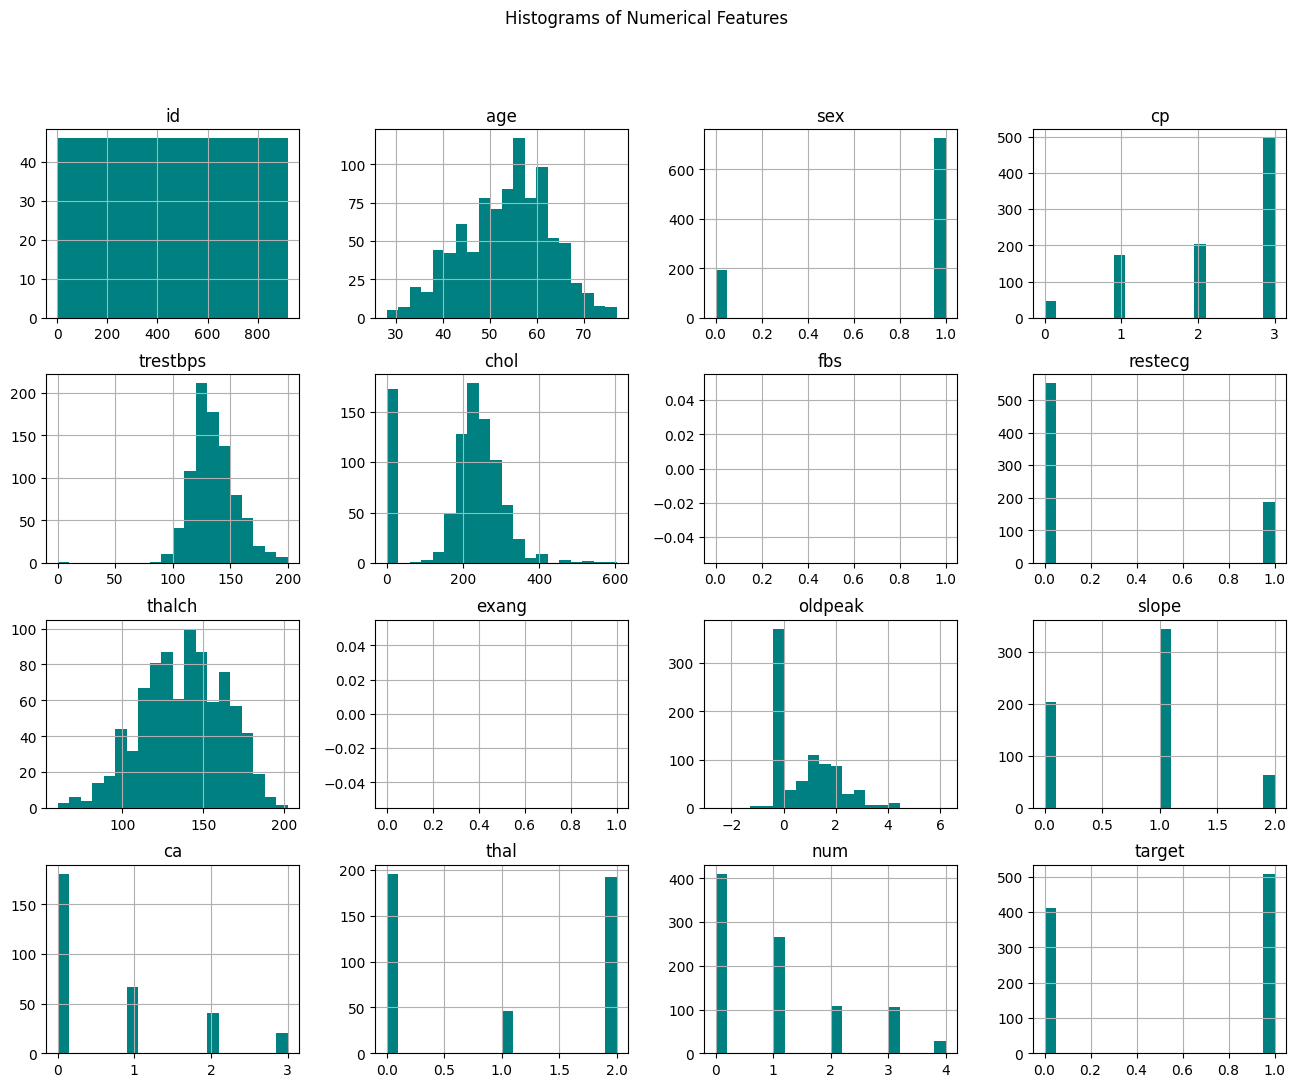

In [11]:
# Histograms for all numerical features
df.hist(bins=20, figsize=(16, 12), color='teal')
plt.suptitle('Histograms of Numerical Features')
plt.show()


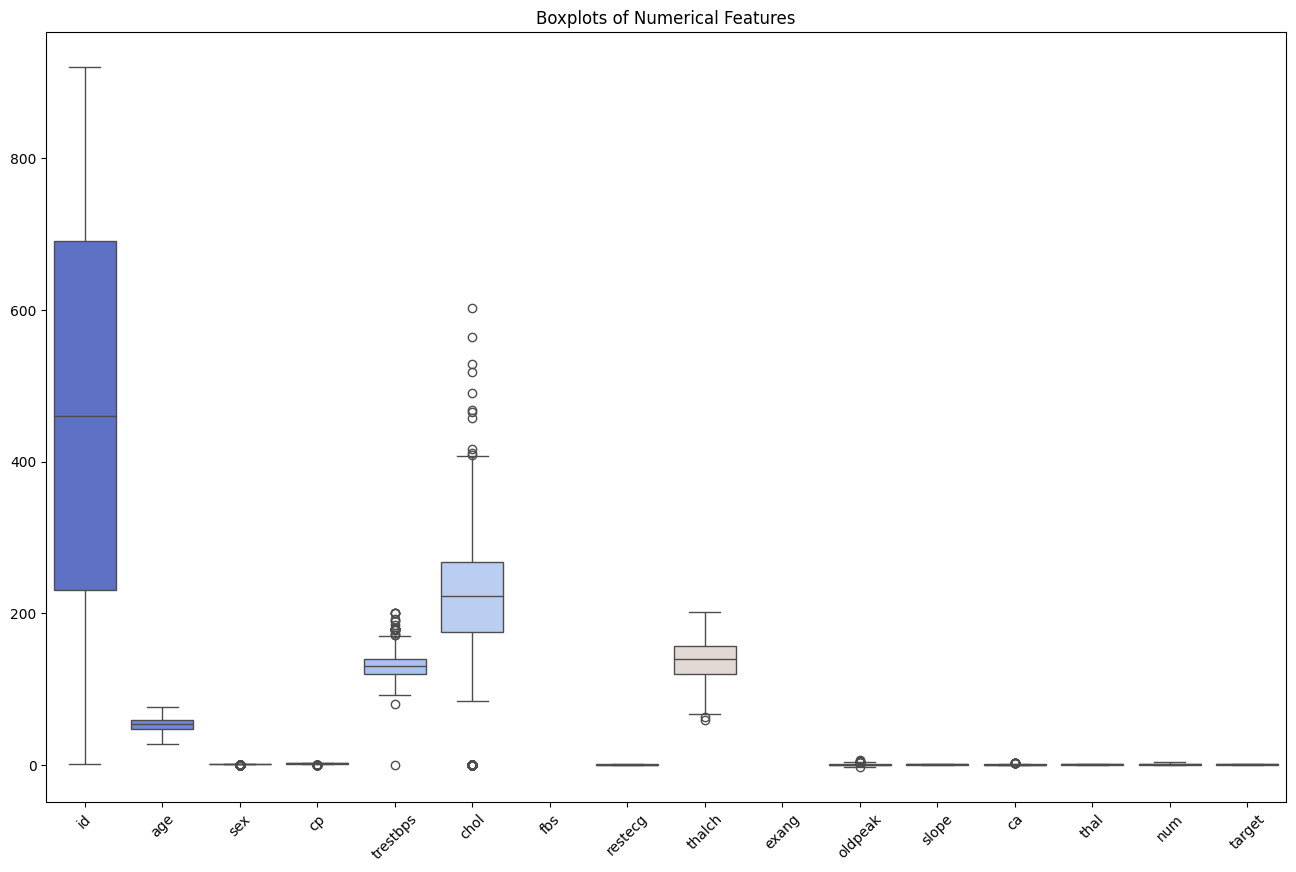

In [12]:
# Boxplots of numerical features
plt.figure(figsize=(16, 10))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']), palette='coolwarm')
plt.title('Boxplots of Numerical Features')
plt.xticks(rotation=45)
plt.show()


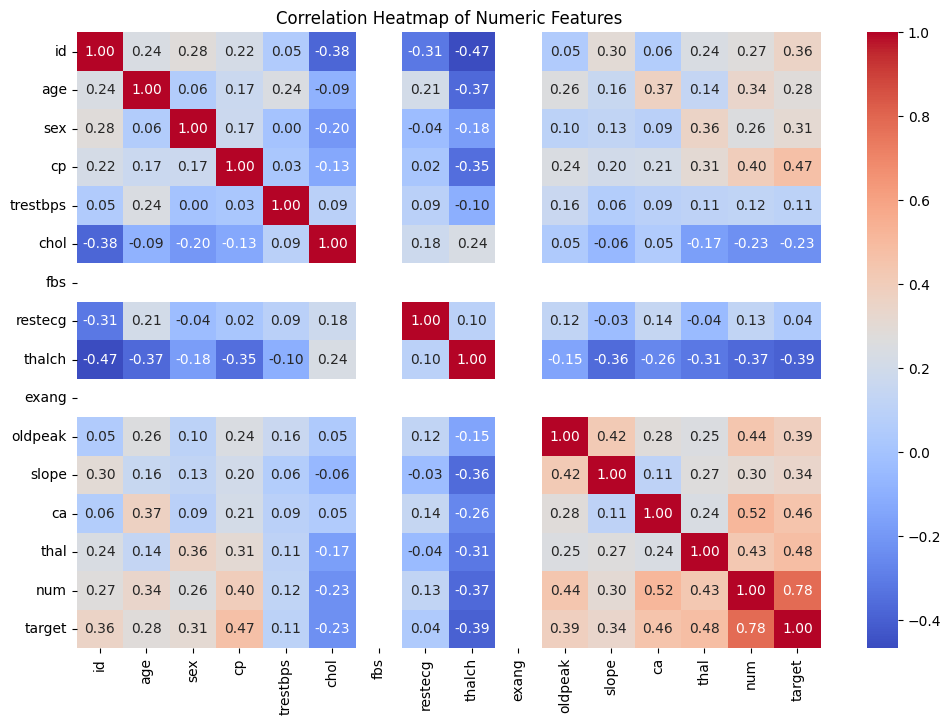

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


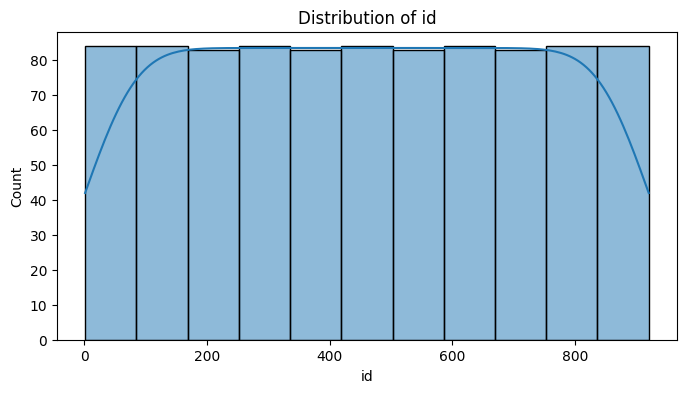

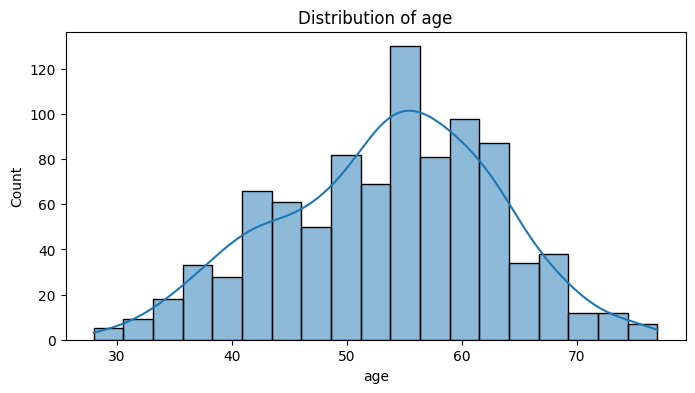

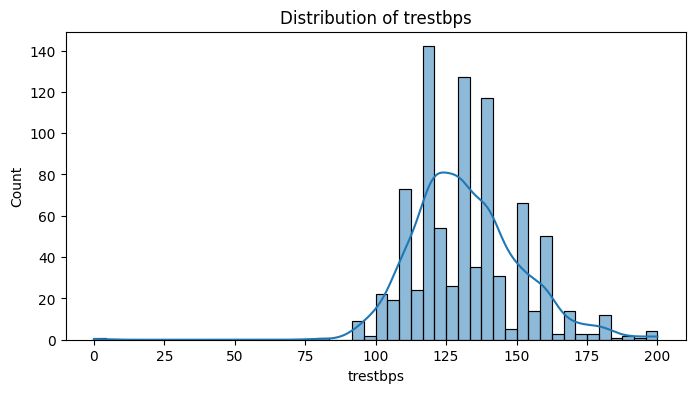

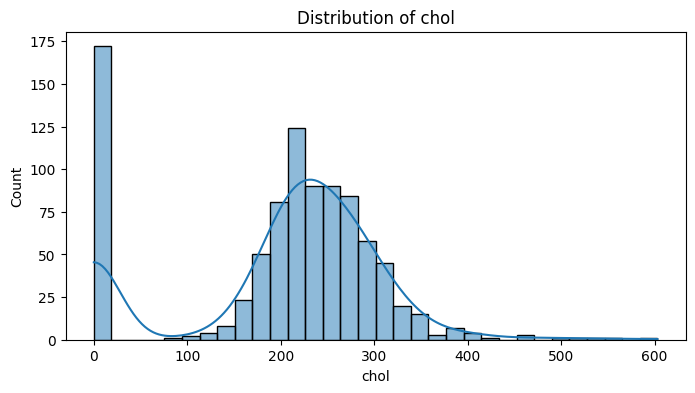

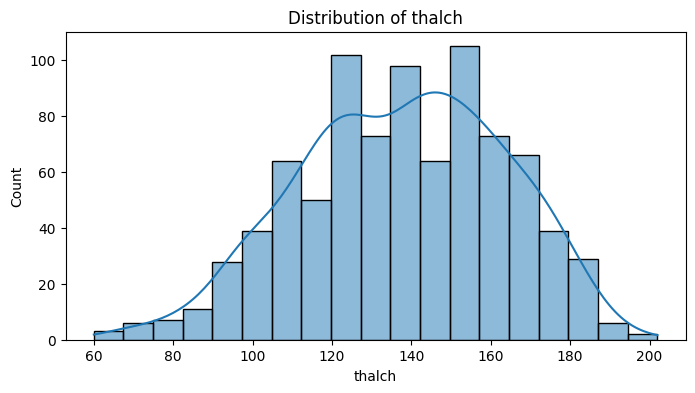

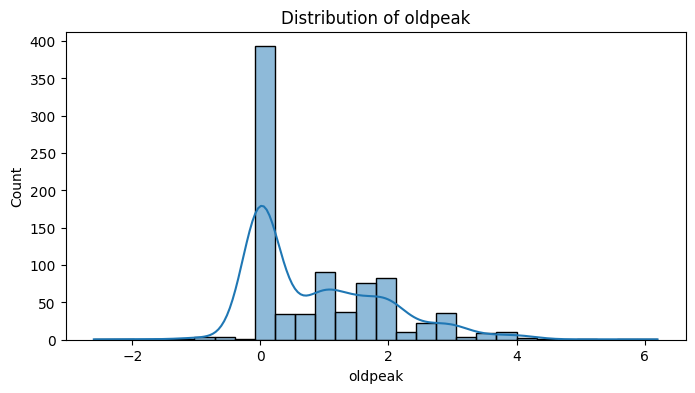

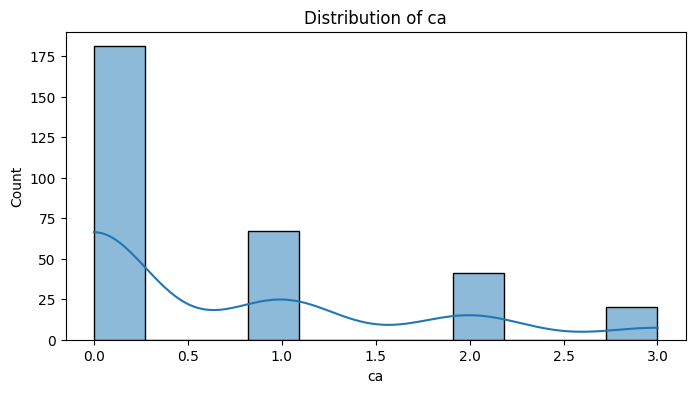

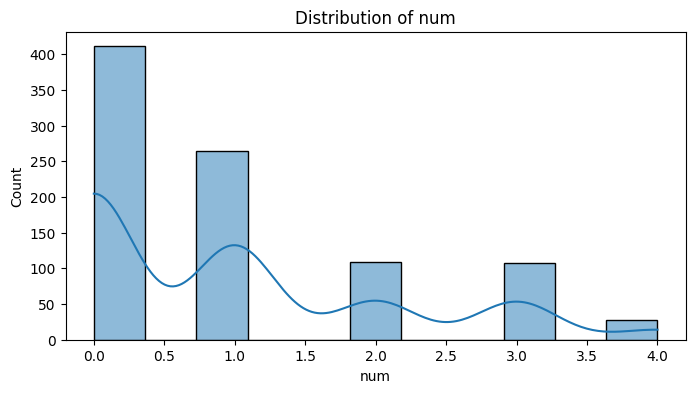

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features

# Select numerical features from the DataFrame (columns with data types float64 or int64)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numerical feature and create a histogram
for feature in numerical_features:
    plt.figure(figsize=(8, 4))  # Set the figure size for each plot
    sns.histplot(df[feature], kde=True)  # Plot the histogram with kernel density estimate (KDE) line
    plt.title(f'Distribution of {feature}')  # Add a title to the plot
    plt.show()  # Display the plot


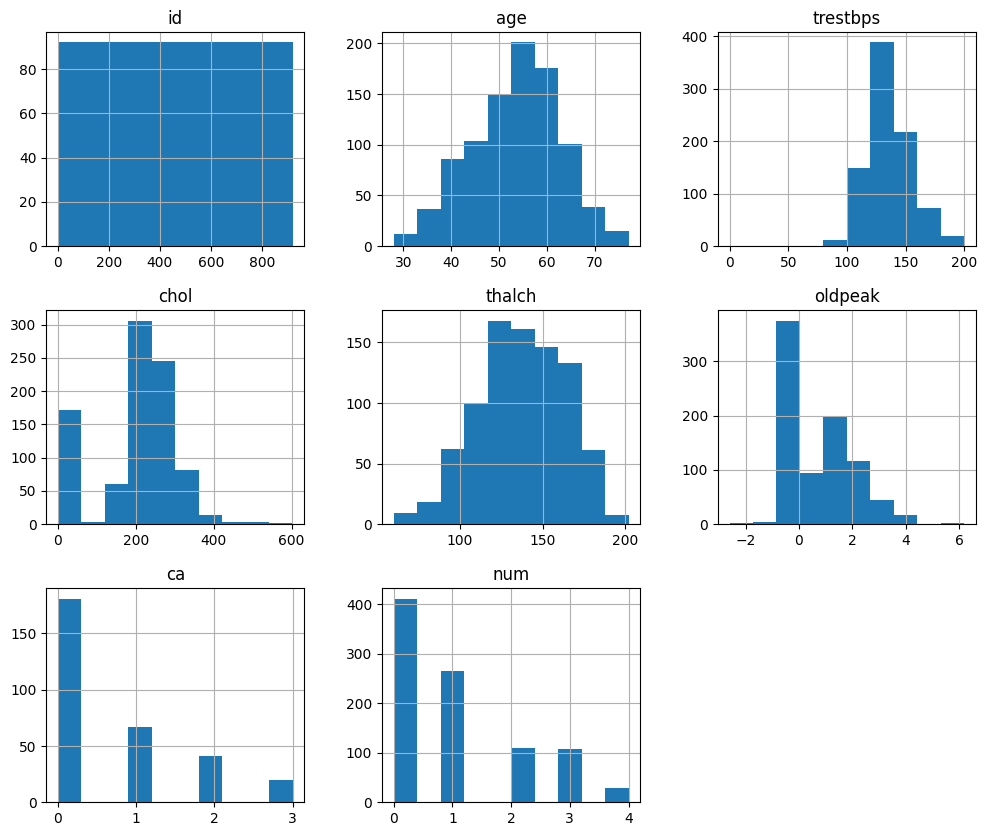

In [25]:
import matplotlib.pyplot as plt

# Generate histograms for all columns in the DataFrame
df.hist(figsize=(12, 10))  # Create a grid of histograms with a figure size of 12x10

# Display the plots
plt.show()  # Show all histograms at once


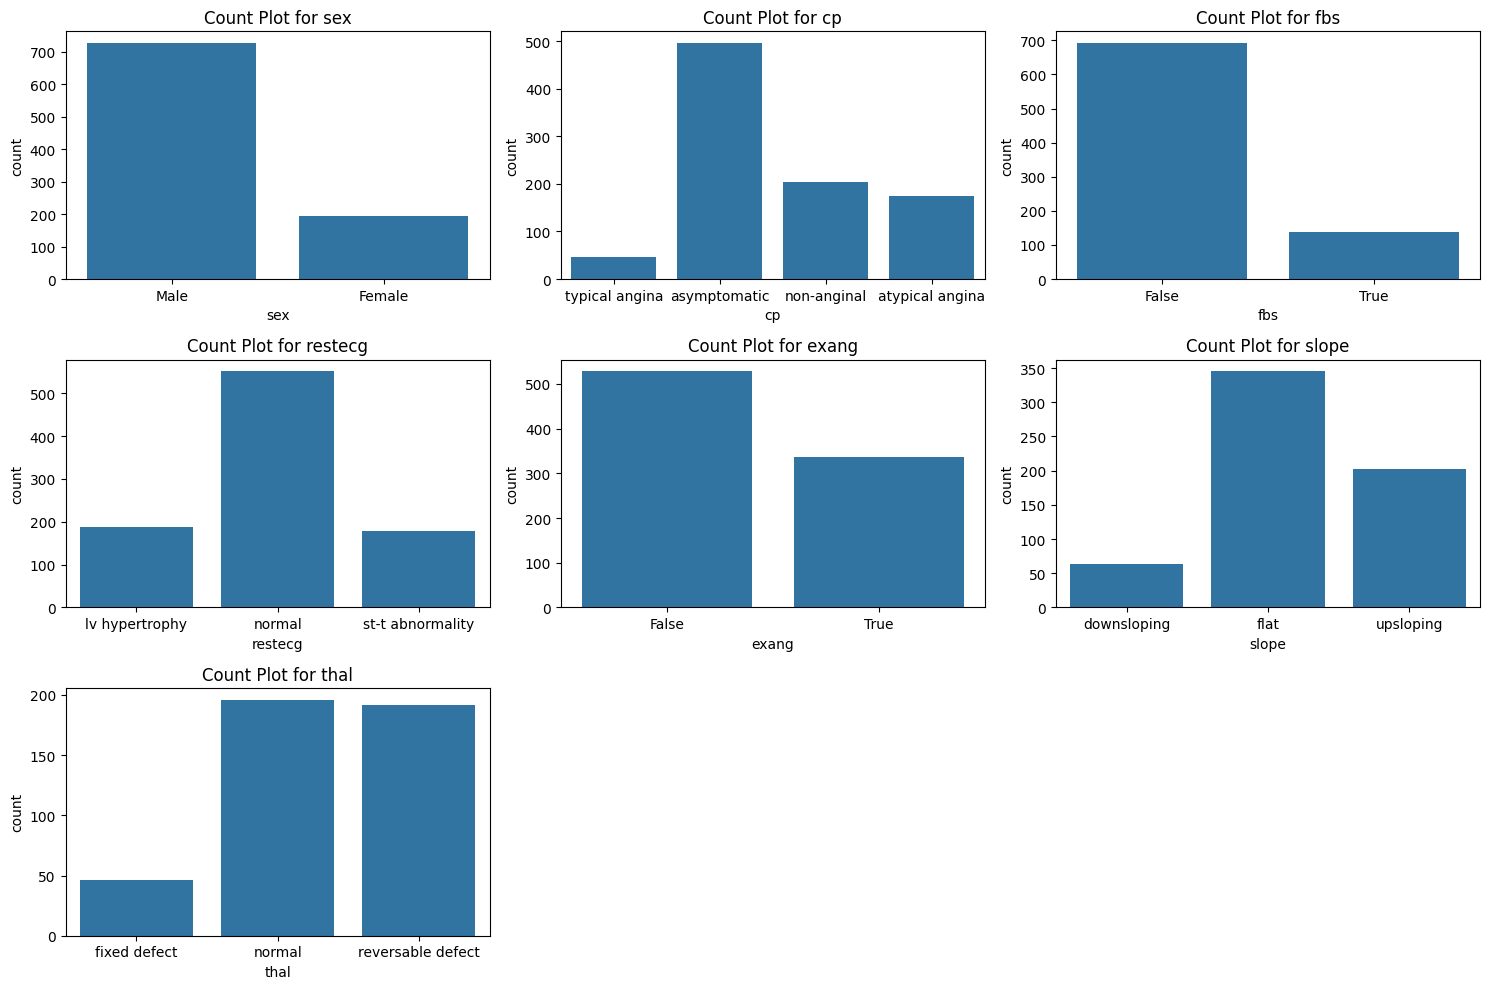

In [26]:
# Count plots for multiple categorical features
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot for {col}')
    plt.tight_layout()
plt.show()


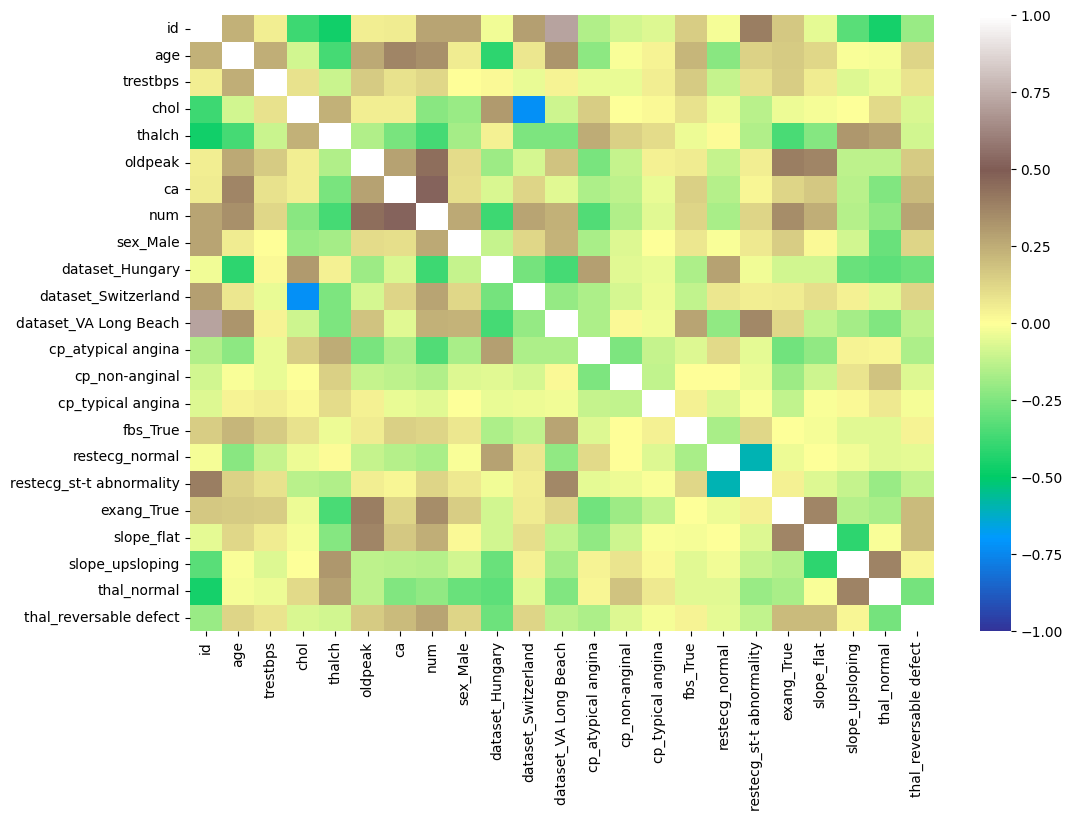

In [27]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)  # Convert categorical variables into dummy/indicator variables, drop the first level to avoid multicollinearity

# Compute the correlation matrix
corr = df_encoded.corr()  # Calculate the correlation between features in the encoded DataFrame

# Generate a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))  # Set the size of the figure
sns.heatmap(corr, annot=False, cmap='terrain', vmin=-1, vmax=1)  # Create a heatmap with the 'terrain' colormap, setting correlation bounds from -1 to 1
plt.show()  # Display the heatmap
